#welcome students

In [ ]:
#@title installs
!pip install git+https://github.com/pyscf/properties
#!pip install geometric
!pip install py3Dmol

In [ ]:
#@title import/create functions from https://www.andersle.no/posts/2022/mo/mo.html#mo-mo
import pyscf
from pyscf import dft, gto, scf, lo, tools
#from pyscf.geomopt.geometric_solver import optimize
import py3Dmol
from pyscf.prop import infrared
from pyscf.hessian import thermo
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# for plotting the orbital energies
def mo_plot(x):
  fig, ax = plt.subplots(constrained_layout=True, figsize=(9, 6))
  colors = matplotlib.cm.get_cmap("tab20")(np.linspace(0, 1, len(x.mo_energy)))

  pos = []
  for i, (energy, occ) in enumerate(zip(x.mo_energy, x.mo_occ)):
      left = 3 * i
      right = 3 * i + 2.5
      length = right - left

      (line,) = ax.plot([left, right], [energy, energy], color=colors[i], lw=3)

      electron_x, electron_y = None, None
      if occ == 2:
          electron_x = [left + 0.25 * length, left + 0.75 * length]
          electron_y = [energy, energy]
      elif occ == 1:
          electron_x, electron_y = [left + 0.5], [energy]
      if electron_x and electron_y:
          ax.scatter(electron_x, electron_y, color=line.get_color())

      pos.append(left + 0.5 * length)

  ax.axhline(y=0, ls=":", color="k")
  ax.set_xticks(pos)
  ax.set_xticklabels([f"{i}" for i, _ in enumerate(pos)])
  ax.set(xlabel="MO number", ylabel="Energy / E$_h$")
  sns.despine(fig=fig)

### for viewing tables
def mo_table_time(inp):
  inp.analyze(verbose=False);
  table = pd.DataFrame({"Energy": inp.mo_energy, "Occupancy": inp.mo_occ})
  return table

## for viewing the structures
def view_time(inp):
  veew = py3Dmol.view(width=400,height=400)
  veew.addModel(inp.tostring(format="xyz"),'xyz')
  veew.setStyle({'stick':{},"sphere":{"radius":0.4}})
  return veew.show()

In [ ]:
#@markdown NEXT: select your options:
see_output = 'just show me results' #@param ["see calculation real time","just show me results"]
if see_output == 'see calculation real time':
  verb = 4
else:
  verb = 0
#@markdown then click the 'play' button

# MO time

In [ ]:
#@title  single Hydrogen
mol = gto.M(atom='H 0 0 0', basis='sto3g',spin=1,verbose=verb)
mf = scf.UHF(mol).run()
mo_plot(mf)

<ipython-input-6-6c5efffd8421>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = matplotlib.cm.get_cmap("tab20")(np.linspace(0, 1, len(x.mo_energy)))


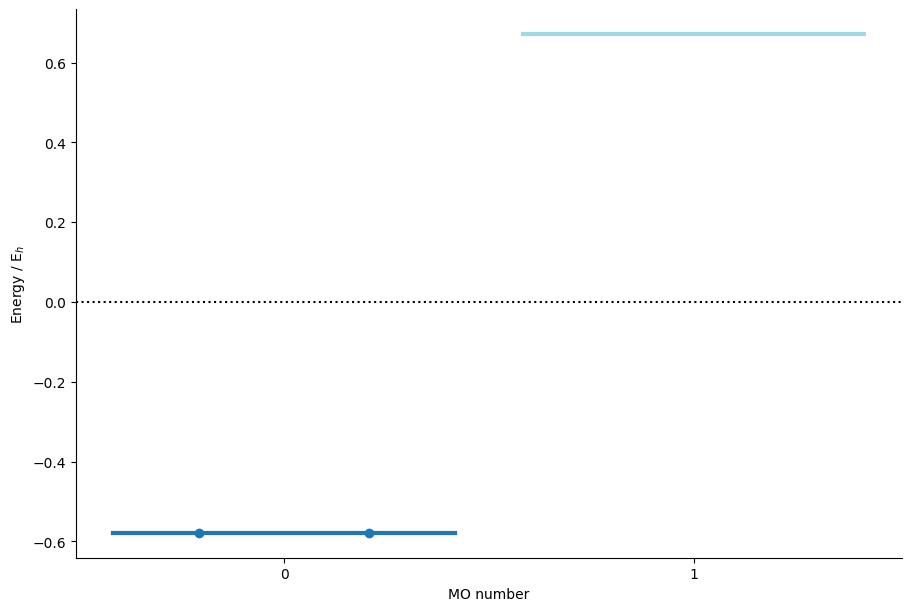

In [ ]:
#@markdown Now lets see hmm H$_2$???
mol = gto.M(atom='H 0 0 0; H .74 0 0', basis='sto3g',verbose=verb)
mf = scf.RHF(mol).run()
mo_plot(mf)

In [ ]:
#@markdown here is a reminder what H$_2$ looks like in case you forgot
view_time(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#@title H$_2$O
mol = gto.M(atom='O 0 0 0; H 0 0 1; H 0 1 0', basis='sto3g',verbose=verb)
mf = scf.RKS(mol).run()
mo_table_time(mf)

,Energy,Occupancy
0,-18.288096,2.0
1,-0.826015,2.0
2,-0.338902,2.0
3,-0.194286,2.0
4,-0.061960,2.0
5,0.290235,0.0
6,0.361457,0.0


In [ ]:
#@markdown See molecule?
view_time(mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

<ipython-input-6-6c5efffd8421>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = matplotlib.cm.get_cmap("tab20")(np.linspace(0, 1, len(x.mo_energy)))


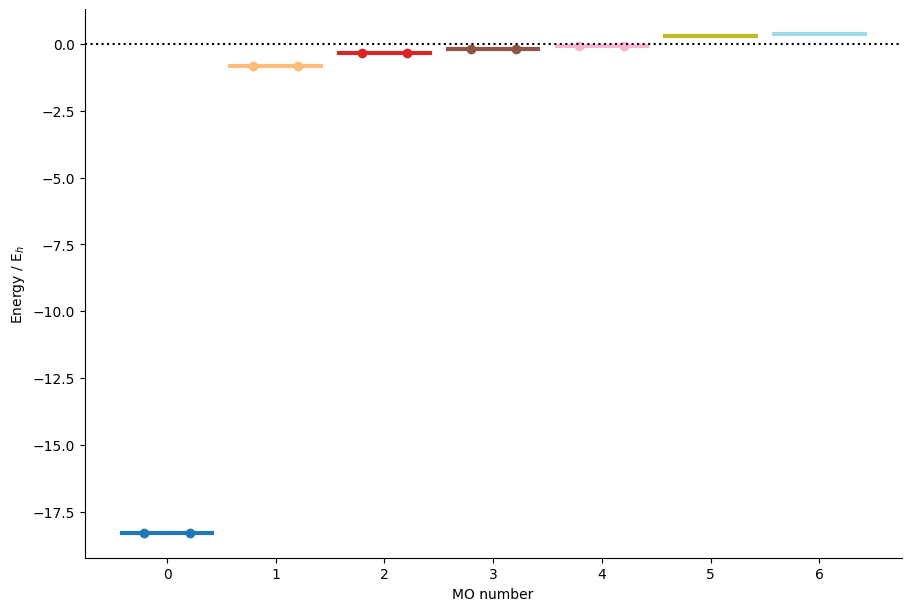

In [ ]:
#@title plotting H$_2$O's MO's
mo_plot(mf)

In [ ]:
#@title what about??? uh Benzene?
benz = gto.Mole()
benz.atom="""
C                 -1.91379321    1.89655170    0.00000000
C                 -0.51863321    1.89655170    0.00000000
C                  0.17890479    3.10430270    0.00000000
C                 -0.51874921    4.31281170   -0.00119900
C                 -1.91357421    4.31273370   -0.00167800
C                 -2.61117521    3.10452770   -0.00068200
H                 -2.46355221    0.94423470    0.00045000
H                  0.03087479    0.94403870    0.00131500
H                  1.27858479    3.10438270    0.00063400
H                  0.03145079    5.26495470   -0.00125800
H                 -2.46369621    5.26501470   -0.00263100
H                 -3.71077921    3.10471070   -0.00086200
"""
benz.basis = "631g"
benz.verbose=verb
benz.build()
benzmf = scf.RHF(benz).run()

mo_plot(benzmf)

In [ ]:
#@title Tables work better
mo_table_time(benzmf)


,Energy,Occupancy
0,-11.241244,2.0
1,-11.240704,2.0
2,-11.240697,2.0
3,-11.239518,2.0
4,-11.239508,2.0
...,...,...
61,1.435542,0.0
62,1.474684,0.0
63,1.718314,0.0
64,1.718373,0.0


In [ ]:
#@markdown click if you forgot what benzene looked like
view_time(benz)

NameError: name 'view_time' is not defined

In [ ]:
#@title You want something more impressivve??
#@markdown how about fullerene?
#
#
#@markdown _yeah it takes a while_
ball = gto.Mole()
ball.atom = """
 C                 -2.63793119    0.51719705    0.00677048
 C                 -1.17404219    0.51719705    0.00677048
 C                 -0.48175319    1.71639505    0.00677048
 C                 -1.21373519    2.98415305    0.00675148
 C                 -2.59840319    2.98412105    0.00677548
 C                 -3.33030919    1.71632605    0.00679148
 C                 -3.09031119   -0.58918795   -0.83837252
 C                 -1.90602519   -1.27293995   -1.36074252
 C                 -0.72166519   -0.58914795   -0.83841652
 C                  0.39850581   -0.43644695   -1.63790652
 C                  0.70250181    1.87781805   -0.83847952
 C                 -0.48184919    3.92907705   -0.83849452
 C                 -1.17425219    4.82285505   -1.63793152
 C                 -2.63814519    4.82283205   -1.63787752
 C                 -3.33041119    3.92902805   -0.83838352
 C                 -4.51473319    3.24522105   -1.36068352
 C                 -4.51467119    1.87770405   -0.83833152
 C                 -4.94257719    0.83120405   -1.63773652
 C                 -4.21058019   -0.43655495   -1.63775852
 C                 -1.90607719   -1.76704495   -2.65424852
 C                 -3.09040319   -1.60567695   -3.49937352
 C                 -4.21061719   -0.95891895   -3.00526552
 C                 -4.94263119   -0.01401095   -3.85043252
 C                 -5.39500119    1.09234105   -3.00523952
 C                 -5.39505319    2.38585905   -3.49933752
 C                 -4.94268719    3.49223405   -2.65418652
 C                 -4.21080219    4.43719705   -3.49942052
 C                 -3.09057519    5.08400005   -3.00540252
 C                  0.70244081    3.24535205   -1.36086652
 C                 -0.72199519    4.06753705   -5.66648752
 C                  0.39827481    3.91491505   -4.86711552
 C                  1.13024781    2.64716405   -4.86710952
 C                  0.70234581    1.60066905   -5.66653552
 C                 -0.48198419    1.76204805   -6.51166652
 C                 -2.63826719    2.96115305   -6.51160152
 C                 -3.09063619    4.06751205   -5.66641652
 C                 -1.90632719    4.75131305   -5.14411552
 C                 -1.90629019    5.24541105   -3.85060752
 C                 -0.72193119    5.08401605   -3.00544252
 C                  0.39829481    4.43727905   -3.49955652
 C                  1.58264281    2.38601405   -3.49960252
 C                  1.58269981    1.09252405   -3.00549252
 C                  1.13030681   -0.01387695   -3.85063152
 C                  0.70237881    0.23314405   -5.14415152
 C                 -0.48190519   -0.45065195   -5.66645952
 C                 -1.21390719    0.49424805   -6.51161252
 C                 -2.59857719    0.49423205   -6.51155652
 C                 -3.33056419    1.76198205   -6.51156152
 C                 -4.21083719    3.91481905   -4.86693352
 C                 -4.94273619    2.64702605   -4.86688752
 C                 -4.51485119    1.60055005   -5.66633252
 C                 -4.51479619    0.23302205   -5.14396852
 C                 -3.33046919   -0.45072095   -5.66635552
 C                 -2.63808119   -1.34449995   -4.86694452
 C                 -1.17418819   -1.34447395   -4.86697652
 C                 -0.72177319   -1.60560595   -3.49949452
 C                  0.39844781   -0.95880695   -3.00545352
 C                  1.13026981    3.49239605   -2.65441352
 C                  1.13038481    0.83135405   -1.63792852
 C                 -1.17435919    2.96119105   -6.51163352
"""
ball.basis = "631g"
ball.verbose=verb
ball.build()
ballmf = scf.RHF(ball)
ballmf.kernel()


In [ ]:
print(verb)

# IR spectra Prediction
* warning transition metals take like, an hour

In [ ]:
#@title H$_2$2O example
input_name = 'H$_2$O'
mol = gto.M(atom='O 0 0 0; H 0 0 1; H 0 1 0', basis='ccpvdz')
mf = dft.RKS(mol, xc="PBE0").run()
mf_ir = infrared.rks.Infrared(mf).run()
mf_ir.summary()
# account for thermal 'spectral broadening' and not just plotting lines
thermo.dump_thermo(mol, thermo.thermo(mf, mf_ir.vib_dict["freq_au"], 298.15, 101325))


fig, ax, ax2 = mf_ir.plot_ir(w=100, scale=0.956)
ax.set_title(f"Infrared Spectra of {input_name}")
fig.tight_layout()
fig.show()
#view
veew = pymol.view(width=400,height=400)
veew.addModel(mol.tostring(format="xyz"),'xyz')
veew.setStyle({'stick':{},"sphere":{"radius":0.4}})
veew.show()

In [ ]:
#@title Build Chromium Cr(CO)$_6$
chrom = gto.Mole()
chrom.atom="""
C                  1.61969332   -0.74385539    1.40440558
C                 -1.58918371   -0.76209347    1.42998710
C                  1.59148489    0.76055512   -1.42743640
C                  0.02892063   -2.01095043   -1.05059734
C                 -1.61218080    0.74484133   -1.41186560
C                 -0.03781868    2.00936095    1.05471093
O                  0.01465075   -2.99473566   -1.56647913
O                  2.42618606   -1.08249190    2.09075426
O                 -0.02848420    2.99166405    1.57260219
O                 -2.41546928    1.08486999   -2.10125968
O                  2.38439811    1.14792243   -2.10214641
O                 -2.38352608   -1.14430646    2.10623261
Cr                 0.00054188   -0.00045775    0.00031059
"""
chrom.basis='lanl2dz' # basis set used lanl for first
chrom.ecp = {'Cr':'lanl2dz'} # use pseudopotential guess from file
chrom.verbose=4 # this uh, prints stuff out so you can see it and it looks cool kinda
chrom.build()

System: uname_result(system='Linux', node='4d42d8249998', release='6.1.58+', version='#1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023', machine='x86_64')  Threads 2
Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy 1.25.2  scipy 1.11.4
Date: Wed May  1 22:32:43 2024
PySCF version 2.5.0
PySCF path  /usr/local/lib/python3.10/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 13
[INPUT] num. electrons = 98
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 C      1.619693320000  -0.743855390000   1.404405580000 AA    3.060776780588  -1.405682963382   2.653941914011 Bohr   0.0
[INPUT]  2 C     -1.589183710000  -0.762093470000   1.429987100000 AA   -3.003121973520  -1.440147939619   2.702283980661 Bohr   0.0
[INPUT]  3 

3Dmol.js failed to load for some reason. Please check your browser console for error messages.



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp1l8ivim6
max_memory 4000 MB (current use 246 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = PBE0
    C. Adamo and V. Barone.,  J. Chem. Phys. 110, 6158 (1999)
    M. Ernzerhof and G. E. Scuseria.,  J. Chem. Phys. 110, 5029 (1999)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x79d7b196d630>
grids dens level: 3
symmetrized grids: False
atomic radii adjust function: 

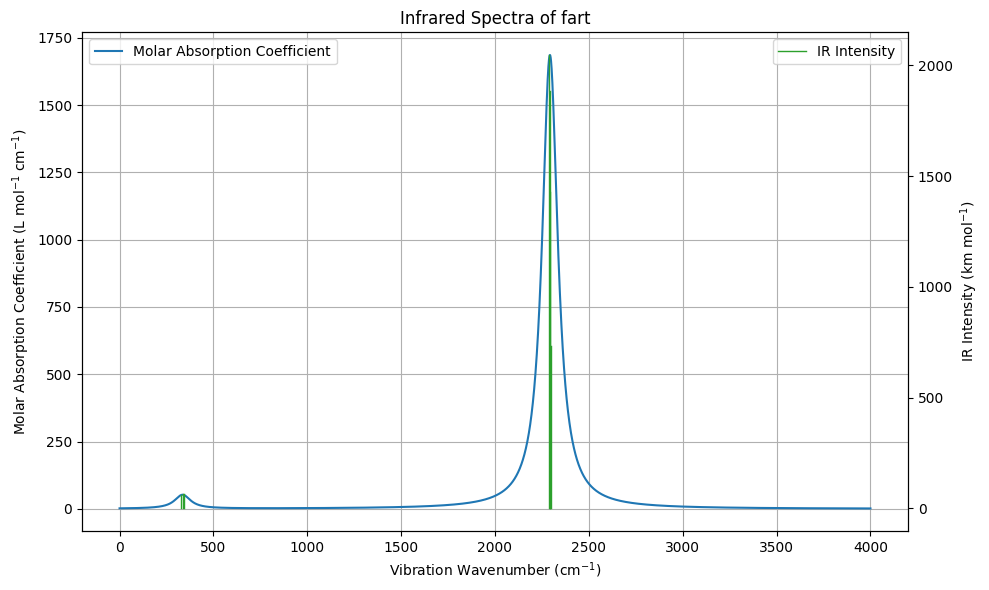

In [ ]:
#@title Predict spectra
input_name = 'Cr(CO)$_2$'
#lanl basis set used
mf = dft.RKS(chrom, xc="PBE0").run()
mf_ir = infrared.rks.Infrared(mf).run()
mf_ir.summary()
# account for thermal 'spectral broadening' and not just plotting lines
thermo.dump_thermo(chrom, thermo.thermo(mf, mf_ir.vib_dict["freq_au"], 298.15, 101325))


fig, ax, ax2 = mf_ir.plot_ir(w=100, scale=0.956)
ax.set_title(f"Infrared Spectra of {input_name}")
fig.tight_layout()
fig.show()

# OTHER spectra

converged SCF energy = -1808.45270713014
------------------------------------------
 Mode      Frequency       Intensity      
   #         cm^-1          km/mol        
------------------------------------------

    0       442.8301i         0.0002
    1       441.5479i         0.0001
    2       440.3729i         0.0001
    3       427.4943i         0.0561
    4       426.3269i         0.3281
    5       424.0886i         0.0423
    6       417.3573i         8.4655
    7       415.7205i         7.9816
    8       413.7382i         7.8688
    9       403.6676i         0.0004
   10       400.8567i         0.0002
   11       398.6105i         0.0001
   12       168.3168i       206.9519
   13       167.4691i       207.9959
   14       165.9015i       208.8820
   15       120.9465          0.0000
   16       123.7310          0.0001
   17       161.6900          0.0985
   18       165.0912          0.0130
   19       168.1813          0.0194
   20       190.9725          0.0000
   21    

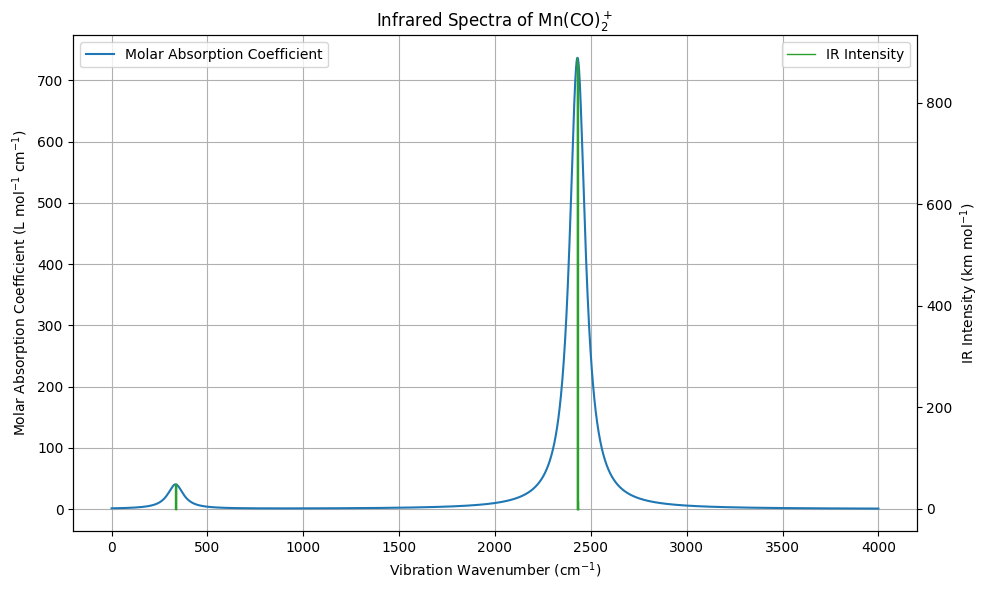

In [ ]:
#@title Manganese
#optimized with HF 6-311g++
mol =gto.Mole()
mol.atom = """
C                 -1.06464620   -1.34884971    1.03208867
C                  1.26896691   -1.44131378   -0.57495700
C                 -1.12911751   -0.34798403   -1.61914779
C                  1.06449137    1.34881792   -1.03212936
C                  1.12919186    0.34805650    1.61924098
C                 -1.26889540    1.44133245    0.57493317
O                 -1.76557238   -0.54422875   -2.53203246
O                 -1.98429138    2.25380633    0.89900737
O                  1.76586452    0.54431557    2.53197552
O                  1.98433344   -2.25373280   -0.89903239
O                 -1.66476953   -2.10932721    1.61389708
O                  1.66462438    2.10908029   -1.61416550
Mn                -0.00006342    0.00001463    0.00011439
"""
input_name = 'Mn(CO)$_2^+$'
#lanl basis set used
mol.charge=1
mol.build()
mf = dft.RKS(mol, xc="PBE0").run()
mf_ir = infrared.rks.Infrared(mf).run()
mf_ir.summary()
# account for thermal 'spectral broadening' and not just plotting lines
thermo.dump_thermo(chrom, thermo.thermo(mf, mf_ir.vib_dict["freq_au"], 298.15, 101325))


fig, ax, ax2 = mf_ir.plot_ir(w=100, scale=0.956)
ax.set_title(f"Infrared Spectra of {input_name}")
fig.tight_layout()
fig.show()

converged SCF energy = -1604.17782310826
------------------------------------------
 Mode      Frequency       Intensity      
   #         cm^-1          km/mol        
------------------------------------------

    0        89.2792          0.0007
    1        90.9666          0.0022
    2        91.2929          0.0009
    3       136.8691          0.0064
    4       138.0121          0.0154
    5       140.2078          0.0014
    6       169.4942          2.2270
    7       169.9997          2.1644
    8       171.7607          2.2758
    9       364.7219          0.1318
   10       366.2759          0.0616
   11       383.6721          0.1683
   12       448.2838         48.3176
   13       450.8037         60.9527
   14       451.0735         48.1561
   15       459.5142          8.9728
   16       462.4484          6.1012
   17       468.5664          0.5534
   18       508.5537          0.4626
   19       509.1640          0.4807
   20       514.1469          0.0336
   21    

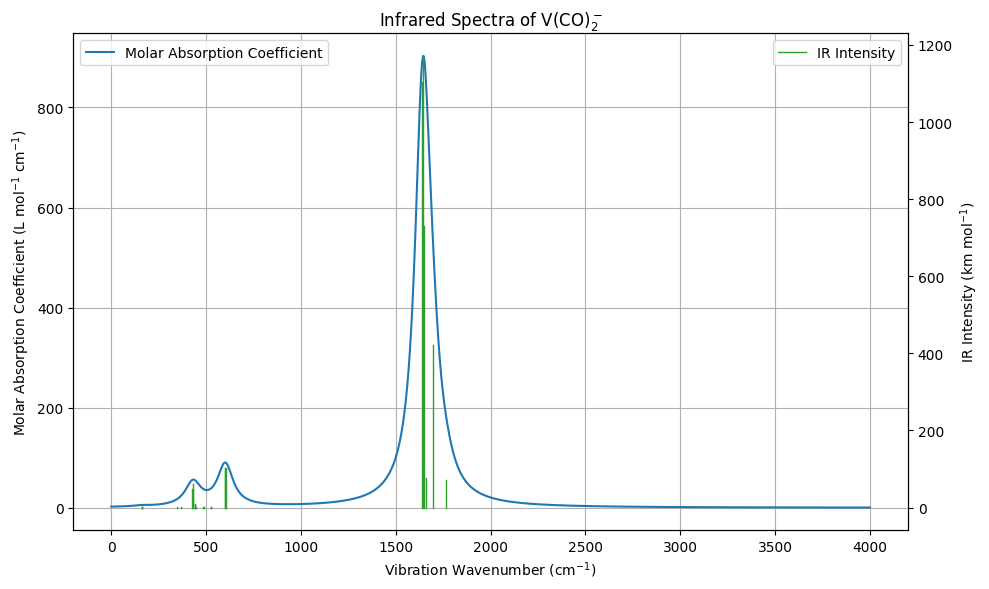

In [ ]:
#@title Vanadium
#optimized with HF 6-311g++
mol =gto.Mole()
mol.atom="""
V                 -0.31636042   -0.38760424   -0.03559317
C                 -2.28305158   -0.41905937   -0.08731763
C                 -0.22243226   -2.35493841   -0.09877582
C                 -0.41091001    1.58137615    0.02801137
C                 -0.34675217   -0.54954350    1.92593490
C                  1.65404419   -0.35978301    0.02282988
C                 -0.24260991   -0.30347908   -2.00761994
O                 -0.36945186   -0.64719163    3.18026329
O                 -3.54057689   -0.44588446   -0.12775837
O                 -0.19572821   -0.25002292   -3.25227207
O                  2.91076668   -0.34332321    0.06068935
O                 -0.47444614    2.83668872    0.04708509
O                 -0.16359948   -3.61303066   -0.13381827
"""
input_name = 'V(CO)$_2^-$'
#lanl basis set used
mol.charge=-1
mol.build()
mf = dft.RKS(mol, xc="PBE0").run()
mf_ir = infrared.rks.Infrared(mf).run()
mf_ir.summary()
# account for thermal 'spectral broadening' and not just plotting lines
thermo.dump_thermo(chrom, thermo.thermo(mf, mf_ir.vib_dict["freq_au"], 298.15, 101325))


fig, ax, ax2 = mf_ir.plot_ir(w=100, scale=0.956)
ax.set_title(f"Infrared Spectra of {input_name}")
fig.tight_layout()
fig.show()

In [ ]:
#@markdown analyzing Vanadium MO
mf.analyze(verbose=False);
table = pd.DataFrame({"Energy": mf.mo_energy, "Occupancy": mf.mo_occ})
table

,Energy,Occupancy
0,-195.112416,2.0
1,-21.986784,2.0
2,-18.831603,2.0
3,-18.825572,2.0
4,-18.825157,2.0
...,...,...
73,0.852497,0.0
74,0.956674,0.0
75,0.963981,0.0
76,0.976097,0.0


#WRITE HOMO and Lumo to files
 * download VMD or PyMol
 * import as a .cube file
 * import your strcuture file
 * cant do it here because it blows up google
 * inspired (stolen) from: https://www.andersle.no/posts/2022/mo/mo.html#mo-mo

In [ ]:
#@title orbital cube files export functiions click file icon on left side to export for viewing  (you can try to use but since theres so much data google colab doesnt like it
def write_all_coeffs(
    mol, coeffs, prefix="cmo", dirname=".", margin=5, offset=0
):
    """Write cube files for the given coefficients."""
    path = pathlib.Path(dirname)
    path.mkdir(parents=True, exist_ok=True)

    for i in range(coeffs.shape[1]):
        outfile = f"{prefix}_{i+offset:02d}.cube"
        outfile = path / outfile
        print(f"Writing {outfile}")
        tools.cubegen.orbital(mol, outfile, coeffs[:, i], margin=margin)

def get_mo(mf, mol):
    """Get molecular orbitals"""
    orbitals = {"canonical": mf.mo_coeff}

    # Get intrinsic bonding orbitals and localized intrinsic valence virtual orbitals (livvo):
    orbocc = mf.mo_coeff[:, 0 : mol.nelec[0]]
    orbvirt = mf.mo_coeff[:, mol.nelec[0] :]

    ovlpS = mol.intor_symmetric("int1e_ovlp")

    iaos = lo.iao.iao(mol, orbocc)
    iaos = lo.orth.vec_lowdin(iaos, ovlpS)
    ibos = lo.ibo.ibo(mol, orbocc, locmethod="IBO")
    orbitals["ibo"] = ibos

    livvo = lo.vvo.livvo(mol, orbocc, orbvirt)
    orbitals["livvo"] = livvo
    return orbitals

def find_homo_lumo(mf):
# function that finds the homo and luomo, it just loops through the energy and occupation outputfile and then grabs the last occupied
# and the first unoccupied
  lumo = float("inf")
  lumo_idx = None
  homo = -float("inf")
  homo_idx = None
  for i, (energy, occ) in enumerate(zip(mf.mo_energy, mf.mo_occ)):
    if occ > 0 and energy > homo:
        homo = energy
        homo_idx = i
    if occ == 0 and energy < lumo:
        lumo = energy
        lumo_idx = i

  return homo, homo_idx, lumo, lumo_idx

### in use vide infra
_, homo_idx, _, lumo_idx = find_homo_lumo(mf)
print(f"HOMO (index): {homo_idx}")
print(f"LUMO (index): {lumo_idx}")
########################### using tthe functions
# generate homo and luomo orbitals
orbitals = get_mo(mf, mol)
tools.cubegen.orbital(
    mol, "cmo_homo.cube", orbitals["canonical"][:, homo_idx], margin=5
)
tools.cubegen.orbital(
    mol, "cmo_lumo.cube", orbitals["canonical"][:, lumo_idx], margin=5
)
"""
tools.cubegen.orbital(
    mol, "livvo_lumo.cube", orbitals["livvo"][:, 0], margin=5
);
"""
tools.cubegen.orbital(mol, "ibo_homo.cube", orbitals["ibo"][:, -1], margin=5) #instrinsically bonding orbital

HOMO (index): 4
LUMO (index): 5


In [ ]:
# use this cell to read your new cube files into a variable
data = None
with open("ibo_homo.cube", "r") as infile:
    data = infile.read()

#print(data)

In [ ]:
#this will attempt to reead from that variable and show it
view = py3Dmol.view()
view.addVolumetricData(
    data,
    "cube",
    {
        "isoval": 0.05,
        "smoothness": 5,
        "opacity": 0.8,
        "volformat": "cube",
        "color": "blue",
    },
)
view.addVolumetricData(
    data,
    "cube",
    {
        "isoval": -0.05,
        "smoothness": 5,
        "opacity": 0.8,
        "volformat": "cube",
        "color": "orange",
    },
)
view.addModel(data, "cube")
view.setStyle({"stick": {}})
view.zoomTo()
view.show()
